# Transformación de Datos
Con el dataset limpio, se procede a realizar la etapa de transformación de datos.


### **Objetivos**

1. **Ingeniería de características**: Se crea una nueva columna para el análisis.
2. **Normalización**: Escalado de los valores numéricos a un rango entre 0 y 1.
3. **Estandarización**: Transformación de los datos numéricos para tener media 0 y desviación estándar 1.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/dataset_clean.csv")

### Ingeniería de Características
Se crea una nueva columna llamada **`Dominant_Pollutant`**  que indica cuál es el contaminante con el valor de AQI más alto para cada registro. Esto va ayudar a identificar qué contaminante está predominando en cada ubicación. es el contaminante dominante (CO, Ozone, NO2, PM2.5)



In [7]:
def contaminante_dominante(row):
    contaminantes = {
        'CO': row['CO AQI Value'],
        'Ozone': row['Ozone AQI Value'],
        'NO2': row['NO2 AQI Value'],
        'PM2.5': row['PM2.5 AQI Value']
    }
    # Se devuelve el contaminante con el mayor valor de AQI
    return max(contaminantes, key=contaminantes.get)

# Se aplica la función a cada fila del DataFrame
df['Dominant_Pollutant'] = df.apply(contaminante_dominante, axis=1)

# Mostrar las primeras filas para verificar
print(df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'Dominant_Pollutant']].head())


   CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0             1               36              0               51   
1             1                5              1               41   
2             1               39              2               66   
3             1               34              0               20   
4             0               22              0                6   

  Dominant_Pollutant  
0              PM2.5  
1              PM2.5  
2              PM2.5  
3              Ozone  
4              Ozone  


#### Impresión de las Primeras 10 Filas del Dataset con la nueva columna

In [8]:
df.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Dominant_Pollutant
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,PM2.5
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,PM2.5
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,PM2.5
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,Ozone
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,Ozone
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,PM2.5
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate,PM2.5
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate,PM2.5
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate,PM2.5
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups,PM2.5


### Normalización

Los valores numéricos se deben escalar para estar en un rango entre 0 y 1. Esto es útil cuando hay variables en diferentes escalas para obtener una homogeneización de los datos.

Aplicaremos **Min-Max Scaling** a las columnas numéricas para restringir sus valores dentro del rango 0-1.

In [9]:
# Se crea una copia del DataFrame antes de la normalización
df_original = df.copy()

columnas_normalizadas = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Aplicamos la normalización (Min-Max Scaling)
minmax_scaler = MinMaxScaler()
df[columnas_normalizadas] = minmax_scaler.fit_transform(df[columnas_normalizadas])

# Se muestra las primeras filas después de la normalización
print("\nPrimeras filas después de la normalización:")
print(df[columnas_normalizadas].head())


Primeras filas después de la normalización:
   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value
0   0.091093      0.007519         0.153191       0.000000            0.102
1   0.070850      0.007519         0.021277       0.010989            0.082
2   0.121457      0.007519         0.165957       0.021978            0.132
3   0.056680      0.007519         0.144681       0.000000            0.040
4   0.032389      0.000000         0.093617       0.000000            0.012


### Estandarización

Se convierten los valores numéricos a una distribución con media 0 y desviación estándar 1. Esto es útil cuando queremos que las variables tengan una escala comparable, sin importar sus unidades originales.

Vamos aplicar **StandardScaler** a las columnas ya normalizadas.

In [10]:
# Aplicamos la estandarización (StandardScaler)
scaler = StandardScaler()

df[columnas_normalizadas] = scaler.fit_transform(df[columnas_normalizadas])

# Se muestra las primeras filas después de la estandarización
print("\nPrimeras filas después de la estandarización:")
print(df[columnas_normalizadas].head())


Primeras filas después de la estandarización:
   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value
0  -0.374828     -0.201076         0.028714      -0.583029        -0.319725
1  -0.553223     -0.201076        -1.074543      -0.392701        -0.502218
2  -0.107234     -0.201076         0.135481      -0.202374        -0.045984
3  -0.678100     -0.201076        -0.042463      -0.583029        -0.885455
4  -0.892175     -0.746909        -0.469531      -0.583029        -1.140946


### Visualizaciones

#### Distribución de los valores antes y después de la Normalización

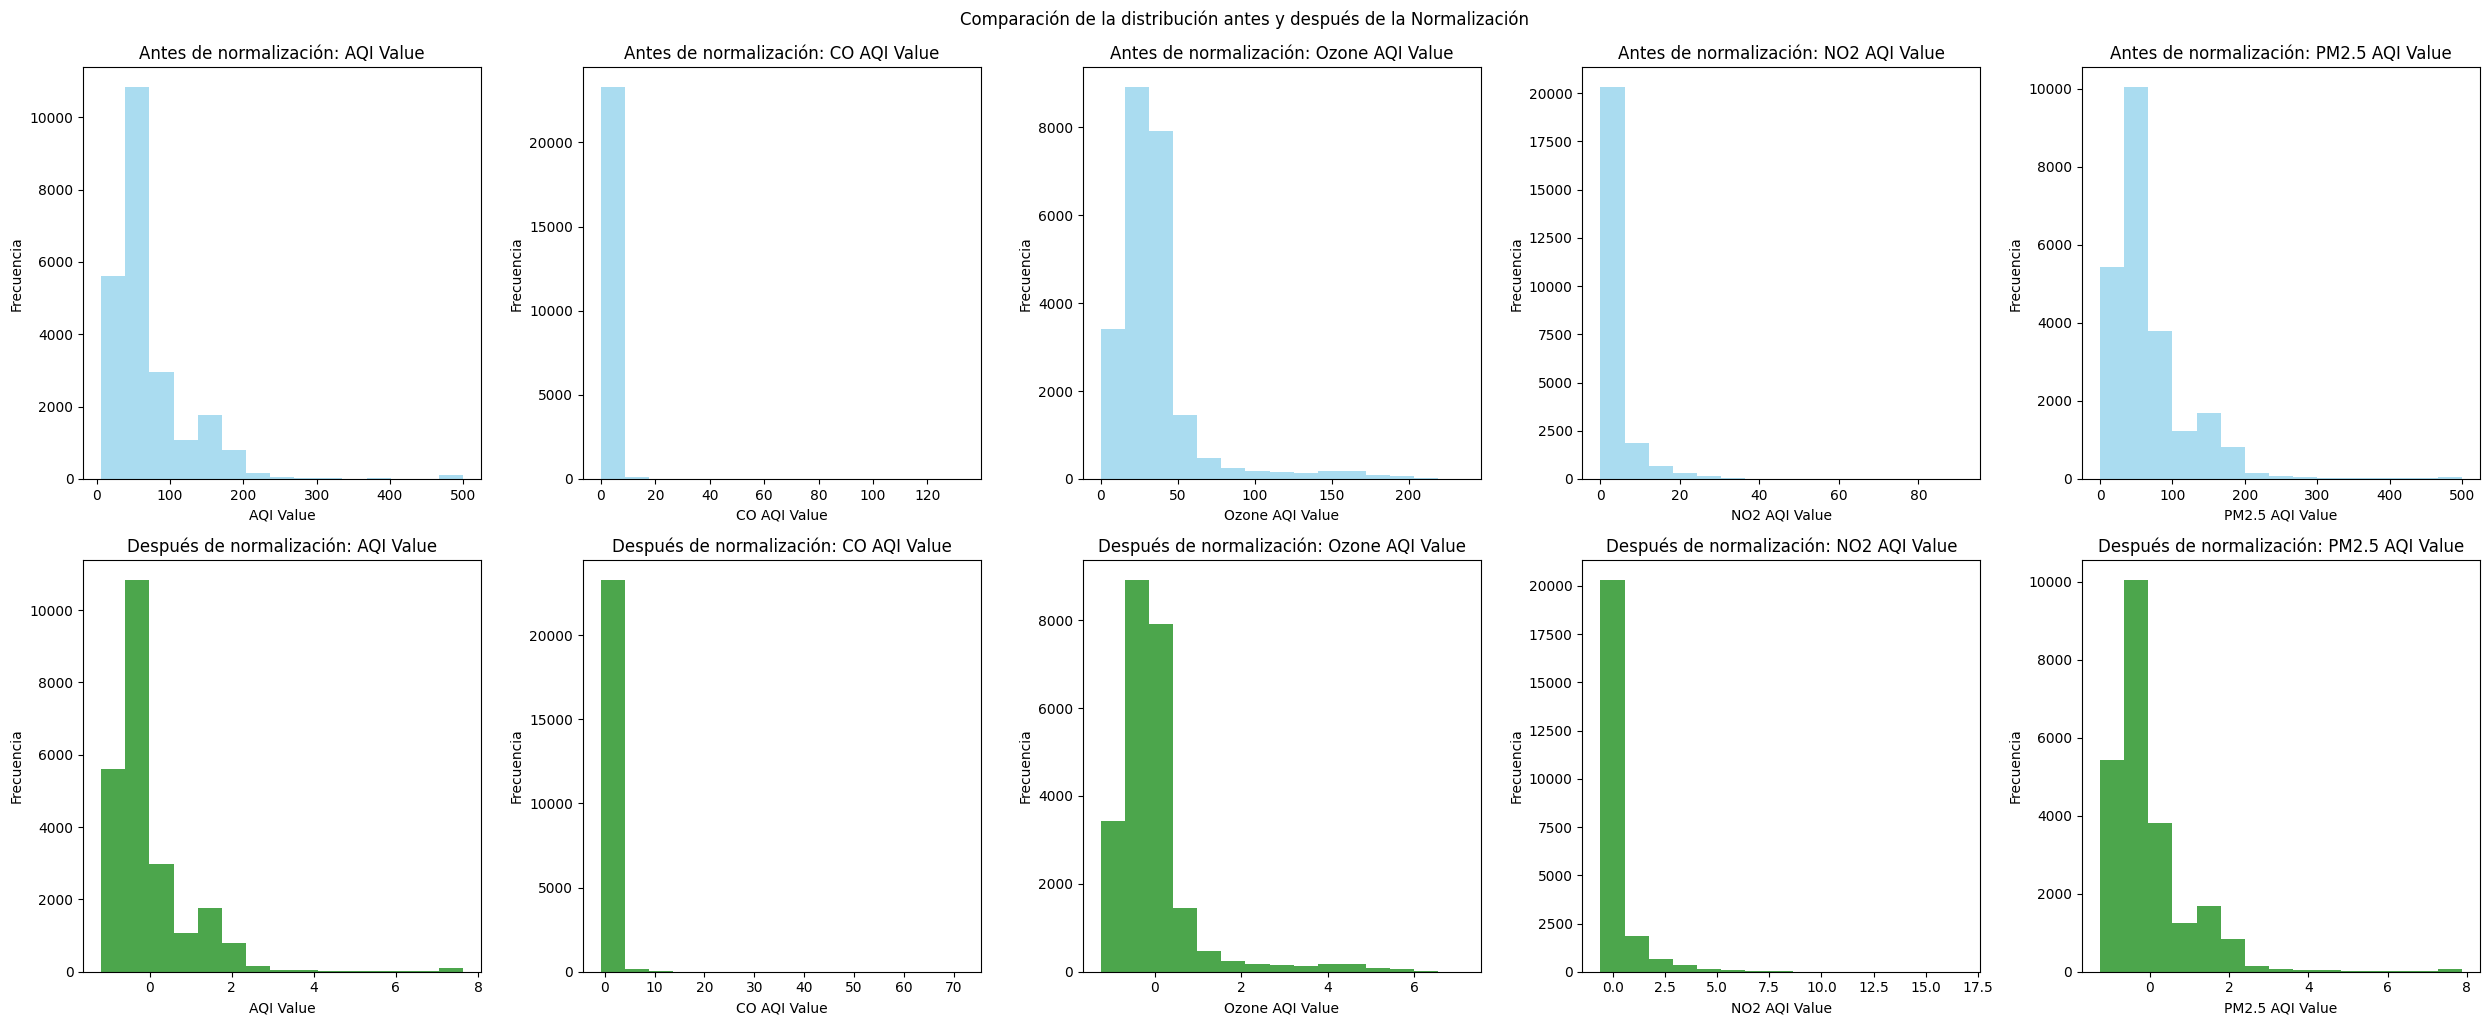

In [14]:
# Se crea una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=len(columnas_normalizadas), figsize=(25, 10))

# Histograma antes de la normalización (Fila 1)
for i, col in enumerate(columnas_normalizadas):
    axes[0, i].hist(df_original[col], bins=15, color='skyblue', alpha=0.7)
    axes[0, i].set_title(f"Antes de normalización: {col}")
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel("Frecuencia")

# Histograma después de la normalización (Fila 2)
for i, col in enumerate(columnas_normalizadas):
    axes[1, i].hist(df[col], bins=15, color='green', alpha=0.7)
    axes[1, i].set_title(f"Después de normalización: {col}")
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel("Frecuencia")

# Se ajusta el espaciado
plt.tight_layout()
plt.suptitle("Comparación de la distribución antes y después de la Normalización", y=1.02)
plt.show()